In [5]:
#导入包
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras




2.0.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
# 加载数据集，输出数据集形状，并将训练集分出一部分为验证集
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_train,y_train = x_train_all[:55000],y_train_all[:55000]
x_valid,y_valid = x_train_all[55000:],y_train_all[55000:]


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#数据处理
from sklearn.preprocessing import StandardScaler

fashion_mnist = keras.datasets.fashion_mnist
(x_tarin_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_train,y_train = x_tarin_all[:55000],y_train_all[:55000]
x_valid,y_valid = x_tarin_all[55000:],y_train_all[55000:]

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(
                                        x_train.astype(np.float32).reshape(-1,1)
                                      ).reshape(-1,28,28) 
x_valid_scaled = scaler.transform(
                                    x_valid.astype(np.float32).reshape(-1,1)
                                  ).reshape(-1,28,28)
x_test_scaled = scaler.transform(
                                    x_test.astype(np.float32).reshape(-1,1)
                                ).reshape(-1,28,28)
                

In [ ]:
#构建模型

#批归一化：将对数据进行诡异化地思想引入到神经网络中，将每一层地输出进行归一化，能缓解梯度消失，能使函数更容易收敛；但是会加大计算量
#在具体地某一层后加上 model.add(keras.layers.BatchNormalization())

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))  
for i in [400, 400, 300,]:
    model.add(keras.layers.Dense(units = i, activation = 'relu'))
    model.add(keras.layers.BatchNormalization())
    
    """也可以将activation加在批归一化之后，形式如下：
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    """
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))




model.compile(loss = 'sparse_categorical_crossentropy',    
              optimizer = 'adam',
              metrics = ['accuracy'] )

history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),batch_size=5000, epochs = 10)



In [19]:
#selu : 可以实现归一化地激活函数
#selu运行速度比relu慢，但是在这个例子中正确率提高了5个百分点。

# AlphaDropout: 1. 均值和方差不变 2. 归一化性质也不变

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))  
for i in [300, 300, 300,]:
    model.add(keras.layers.Dense(units = i, activation = 'relu'))
    model.add(keras.layers.AlphaDropout(rate=0.5))    #直接写0.5也行
# model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',    
              optimizer = 'adam',
              metrics = ['accuracy'] )

history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),batch_size=5000, epochs = 10)


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 65us/sample - loss: 2.9434 - accuracy: 0.1153 - val_loss: 1.6352 - val_accuracy: 0.3958
Epoch 2/10
55000/55000 [==============================] - 3s 46us/sample - loss: 2.2615 - accuracy: 0.2468 - val_loss: 3.0738 - val_accuracy: 0.5234
Epoch 3/10
55000/55000 [==============================] - 3s 47us/sample - loss: 1.6352 - accuracy: 0.4202 - val_loss: 3.2842 - val_accuracy: 0.6436
Epoch 4/10
55000/55000 [==============================] - 3s 46us/sample - loss: 1.2863 - accuracy: 0.5220 - val_loss: 3.0314 - val_accuracy: 0.7000
Epoch 5/10
55000/55000 [==============================] - 3s 47us/sample - loss: 1.0829 - accuracy: 0.5957 - val_loss: 3.1699 - val_accuracy: 0.7514
Epoch 6/10
55000/55000 [==============================] - 3s 47us/sample - loss: 0.9507 - accuracy: 0.6368 - val_loss: 2.9576 - val_accuracy: 0.7586
Epoch 7/10
55000/55000 [==============================] -

In [8]:
model.evaluate(x_test_scaled,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6620199756622315, 0.802]

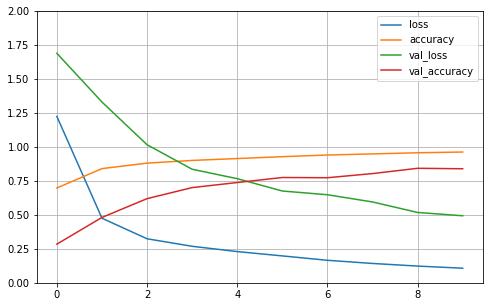

In [11]:
#绘制训练曲线图
def plot_show(history):
    data = pd.DataFrame(history.history)
    data.plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()
plot_show(history)
    